<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Axi_FSDL: Definición de la lente </font>
</div>

- **Para**: Posible paper de axis-FSDL

- **Fecha**: 2023/05/10

- **Objetivos**: - Script para definición de lente $f(r,\theta)=f_1(r)f_2(\theta)$

- **Descripción** - 

- **Referencias**: 
  - [1] Angela Soria-Garcia, Luis Miguel Sanchez-Brea, Jesus del Hoyo, Francisco Jose Torcal-Milla, Jose Antonio Gomez-Pedrero "Fourier series diffractive lens with extended depth of focus" Optics & Laser Technology, Volume 164,109491, 2023, ISSN 0030-3992, https://doi.org/10.1016/j.optlastec.2023.109491.

- **Autores**: 
  - Luis Miguel Sánchez Brea
    




# Introducción

En 

# Desarrollo 

Conviene explicar bien lo que se hace en los júpyter

In [6]:
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import numpy as np
from matplotlib import rcParams



rcParams['figure.dpi'] = 150  #dpi
rcParams['axes.linewidth'] = 1.5
rcParams['axes.formatter.useoffset'] = False
rcParams['font.size'] = 14
rcParams['axes.labelsize'] = 14


In [8]:
import matplotlib
import matplotlib.cm as cm

from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.utils_drawing import draw_several_fields
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from py_aocg.angular_lens import Angular_lens

## Definición de función

In [9]:

    def lens_axi_fourier(self,
                     r0,
                     radius,
                     focal,
                     delta_f,
                     num_periods=2,
                     coefs_radius=np.array([[0, 1], [1, 1]]),
                     coefs_fourier=np.array([[0, 1], [1, 1]]),
                     binarize=False,
                     angle=0 * degrees,
                     mask=True,
                     verbose=False):
        """Transparent lens based in fourier series of border

        Parameters:
            r0 (float, float): (x0,y0) - center of lens
            radius (float, float): radius of lens mask
            focal (float): focal length of lens
            delta_f (float): focal length of lens
            num_periods (int): num loops in a lens
            coefs_radius (np.array): radial series coefficients
            coefs_fourier (np.array): Fourier coefficients
            binarize (bool): If True it is binarized.
            angle (float): angle of axis in radians
            mask (bool): if True, mask with size radius

       References:
             - J.A Gomez-Pedrero et al. "Lente oftálmica refracto-difractiva con profundidad de foco extendida" P202130631 (6 julio e 2021)
        """
        # si solamente un numero, posiciones y radius son los mismos para ambos
        # Definicion del origen, el radius y la focal

        # Vector de onda
        k = 2 * np.pi / self.wavelength

        x0, y0 = r0
        # rotation de la lens
        Xrot, Yrot = self.__rotate__(angle)

        R = np.sqrt((Xrot - x0)**2 + (Yrot - y0)**2)
        theta = np.arctan2((Yrot - y0), (Xrot - x0))

        # Definicion de la amplitude y la phase
        if mask is True:
            amplitude = Scalar_mask_XY(self.x, self.y, self.wavelength)
            amplitude.circle(r0, radius, angle)
            t = amplitude.u
        else:
            t = np.ones_like(self.X)

        shape = 0
        _, num_coefs = coefs_fourier.shape
        for i in range(num_coefs):
            if verbose:
                print(i, coefs_fourier[:, i])
            shape = shape + coefs_fourier[1][i] * np.cos(
                coefs_fourier[0][i] * num_periods * theta)
            
        F1 = focal + delta_f / 2 * shape


        shape_r = 0
        _, num_coefs = coefs_radius.shape
        for i in range(num_coefs):
            if verbose:
                print(i, coefs_radius[:, i])
            shape_r = shape_r + coefs_radius[1][i] * (R/radius)**coefs_radius[0][i] 

        F2 = shape_r

        self.u = t * np.exp(-1.j * k * ((Xrot**2 + Yrot**2) / (2 * F1*F2)))
        self.u[t == 0] = 0

        if binarize is True:
            self.binarize(kind='phase')

        return self # necesario para usar la función como dentro de la clase

## Uso

In [10]:
wavelength = 0.6328*um
radius=2*mm
x = np.linspace(-radius, radius, 512)
y = np.linspace(-radius, radius, 512)

radius_out=400*um
x_out = np.linspace(-radius_out, radius_out, 128)
z_out = np.linspace(25*mm,
                    2 * focal + 4 * delta_f / 2,
                    128)
y_out = np.linspace(-radius_out, radius_out, 128)

focal=250*mm
num_periods=64
delta_f=25*mm

NameError: name 'focal' is not defined

In [ ]:
t1 = Scalar_mask_XY(x, y, wavelength, info='FZP')
t2 = Scalar_mask_XY(x, y, wavelength, info='lens')
t3 = Angular_lens(x, y, wavelength, info='axicon')
t4 = Angular_lens(x, y, wavelength, info='FSDL')
t5 = Scalar_mask_XY(x, y, wavelength, info='axicon-lens')
t6 = Scalar_mask_XY(x, y, wavelength, info='axi-lens')


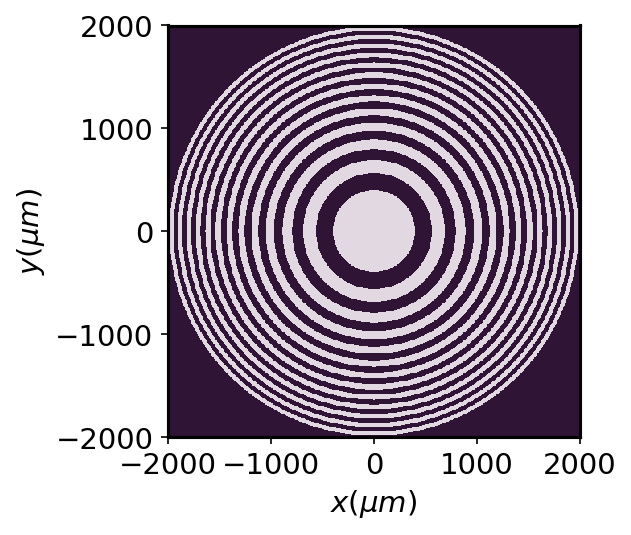

In [ ]:
t1.fresnel_lens(r0=(0,0), kind='phase', phase=np.pi, radius=radius, focal=focal)
t1.draw('phase')

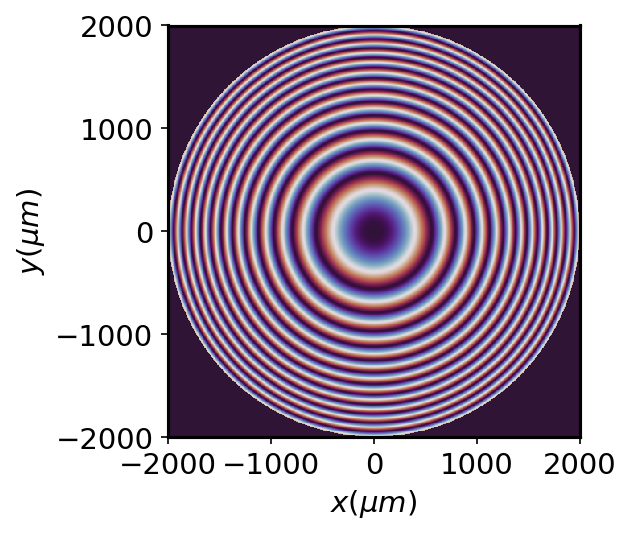

In [ ]:
t2.lens(r0=(0, 0), radius=radius, focal=focal)
t2.draw('phase')

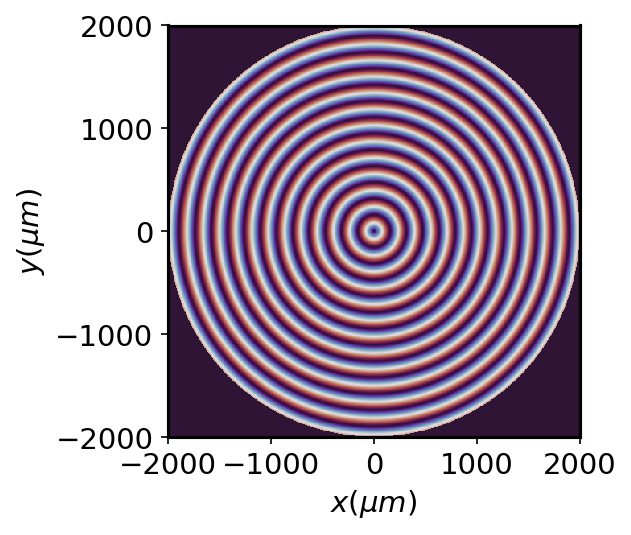

In [ ]:
t3 = lens_axi_fourier(t3,
                      r0=(0, 0),
                      radius=radius,
                      focal=focal,
                      delta_f=delta_f,
                      num_periods=num_periods,
                      coefs_radius=np.array([[1], [1]]),
                      coefs_fourier=np.array([[0, 1], [0, 0]]),
                      binarize=False,
                      angle=0 * degrees,
                      mask=True,
                      verbose=False)

t3.draw('phase')

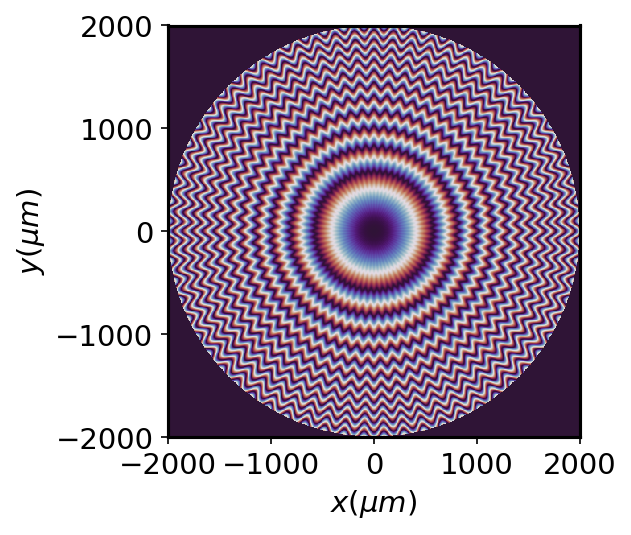

In [ ]:
t4.lens_fourier(r0=(0, 0),
                    radius=radius,
                    focal=focal,
                    delta_f=delta_f,
                    num_periods=num_periods,
                    coefs=np.array([[0, 1], [1, 1]]),
                    binarize=False,
                    angle=0 * degrees,
                    mask=True,
                    verbose=False)

t4.draw('phase')

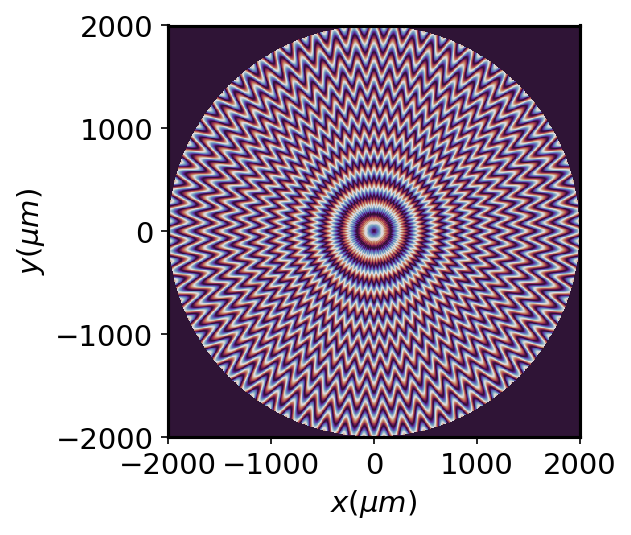

In [ ]:
t5 = lens_axi_fourier(t5,
                      r0=(0, 0),
                      radius=radius,
                      focal=focal,
                      delta_f=delta_f,
                      num_periods=num_periods,
                      coefs_radius=np.array([[1], [1]]),
                      coefs_fourier=np.array([[0, 1], [1, 1]]),
                      binarize=False,
                      angle=0 * degrees,
                      mask=True,
                      verbose=False)

t5.draw('phase')

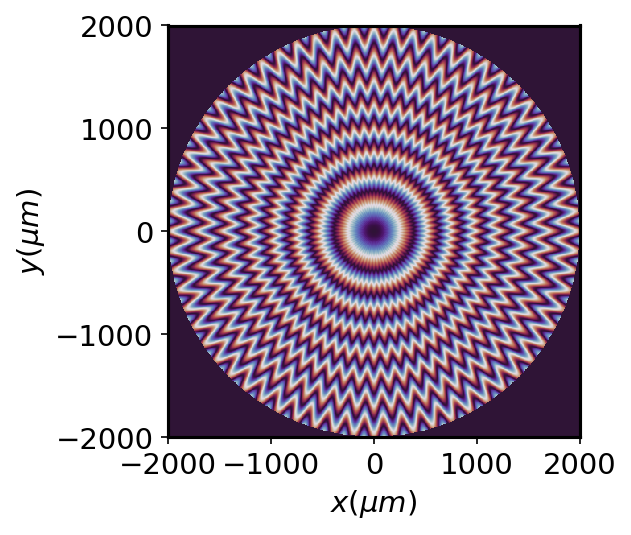

In [ ]:
t6 = lens_axi_fourier(t6,
                      r0=(0, 0),
                      radius=radius,
                      focal=focal,
                      delta_f=delta_f,
                      num_periods=num_periods,
                      coefs_radius=np.array([[0, 1, 2], [0.25, 1, .25]]),
                      coefs_fourier=np.array([[0, 1], [1, 1]]),
                      binarize=False,
                      angle=0 * degrees,
                      mask=True,
                      verbose=False)

t6.draw('phase')

In [ ]:
names = ('FZP', 'lens', 'axicon', 'FSDL', 'axicon-lens', 'axilens')
masks = (t1, t2, t3, t4, t5, t6)
fields = []

num x, num y, num z = 128, 128, 1
num x, num y, num z = 128, 128, 1
num x, num y, num z = 128, 128, 1
num x, num y, num z = 128, 128, 1
num x, num y, num z = 128, 128, 1
num x, num y, num z = 128, 128, 1


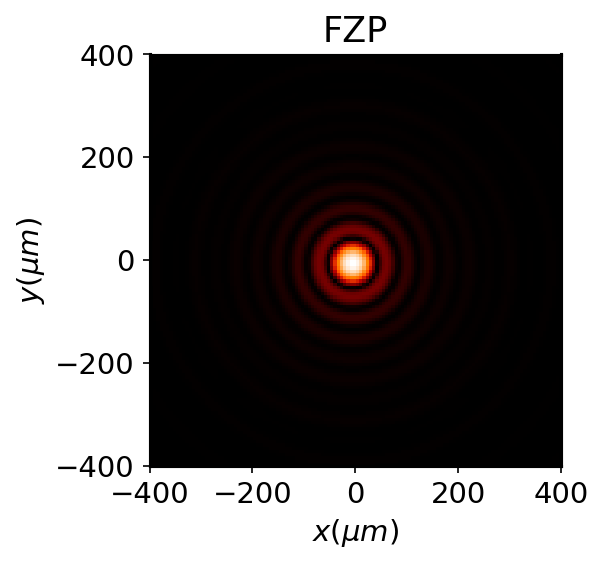

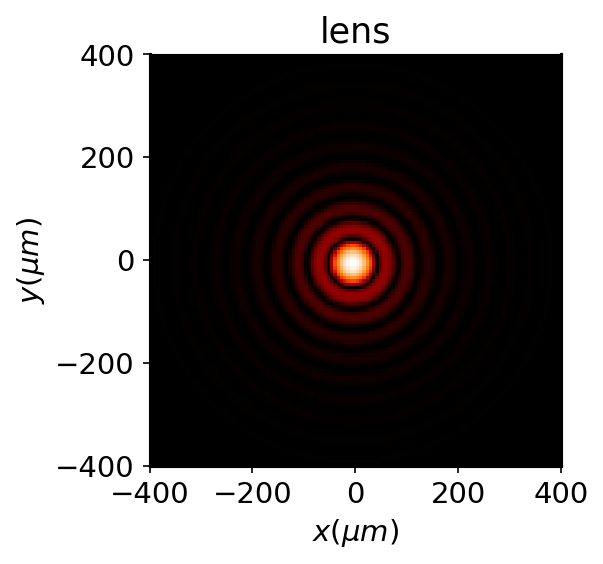

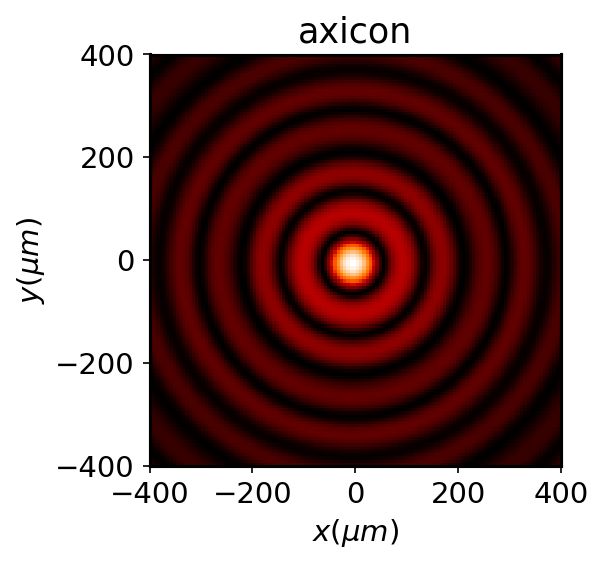

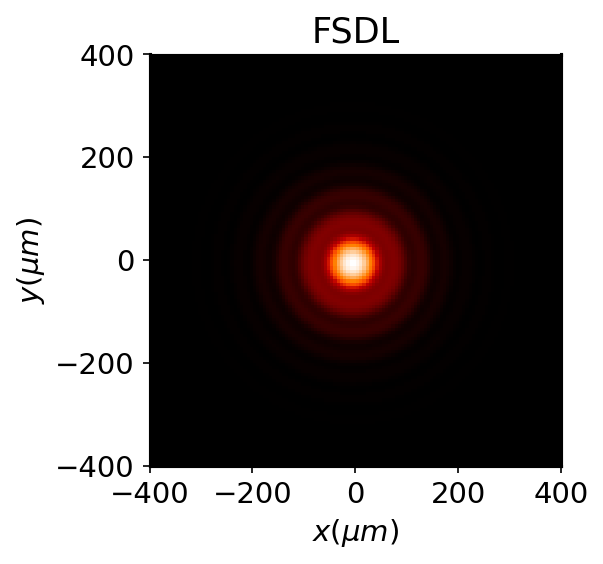

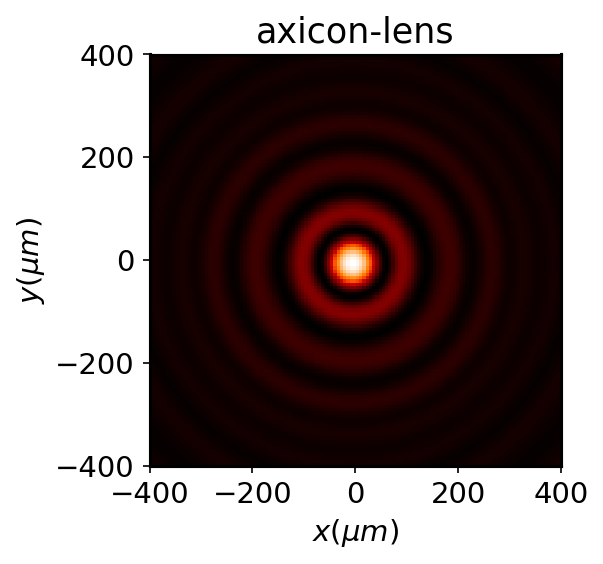

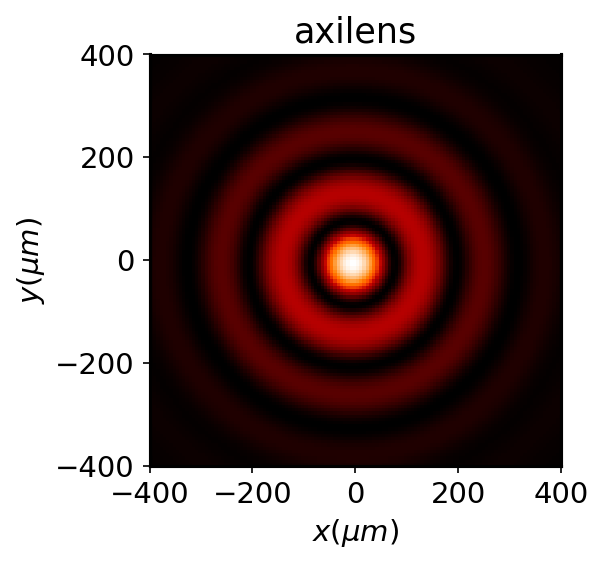

In [ ]:
for t, name in zip(masks, names):
    u1 = t.CZT(focal, xout=x_out, yout=y_out, verbose=True)
    u1.draw(logarithm=1e-1)
    plt.title(name)
    fields.append(u1)

num x, num y, num z = 128, 128, 1


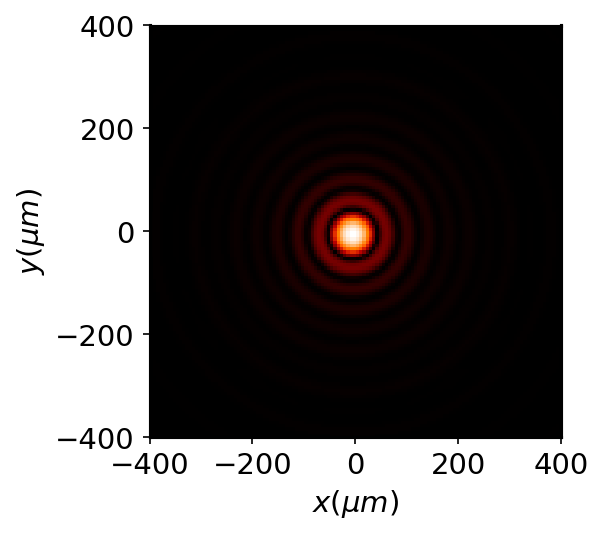

In [ ]:
u1=t1.CZT(focal, xout=x_out, yout=y_out, verbose=True)
u1.draw(logarithm=1e-1)

FZP            :  num x, num y, num z = 128, 1, 128
lens           :  num x, num y, num z = 128, 1, 128
axicon         :  num x, num y, num z = 128, 1, 128
FSDL           :  num x, num y, num z = 128, 1, 128
axicon-lens    :  num x, num y, num z = 128, 1, 128
axilens        :  num x, num y, num z = 128, 1, 128


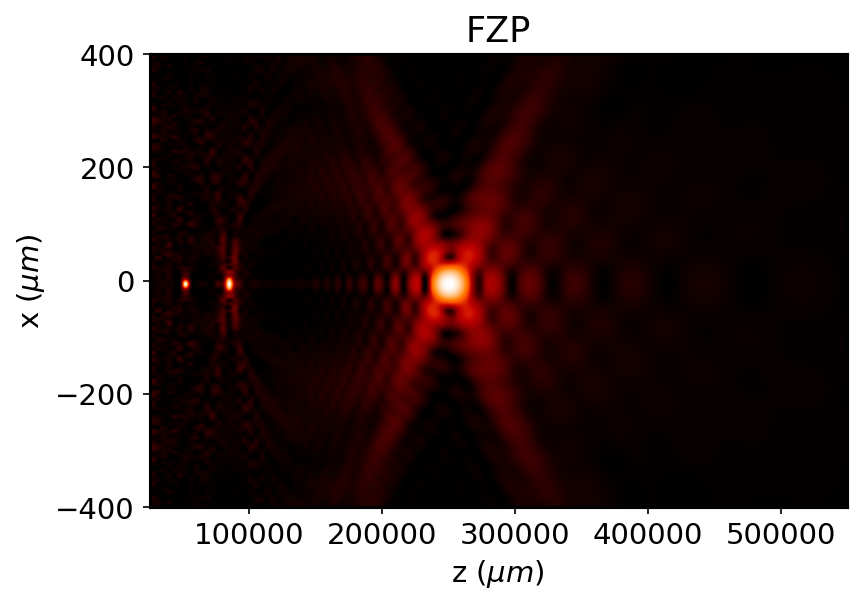

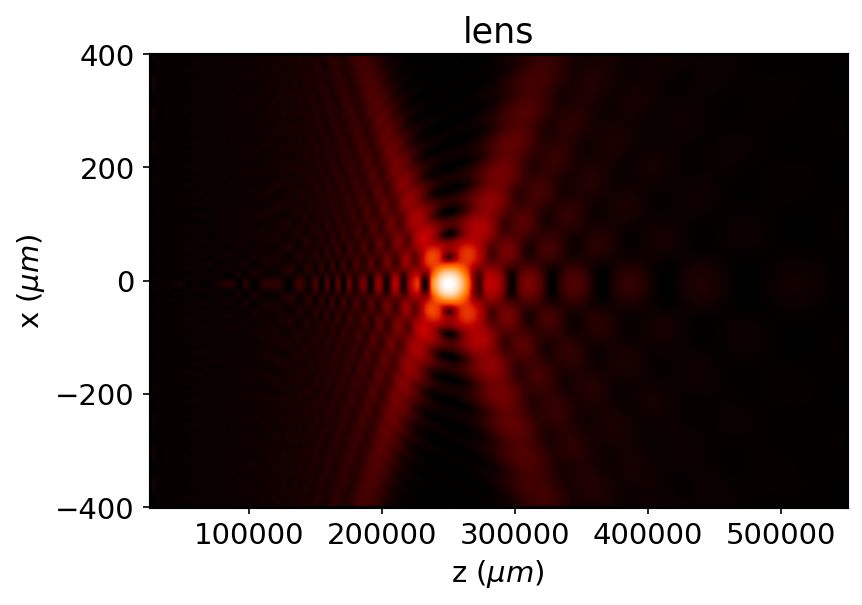

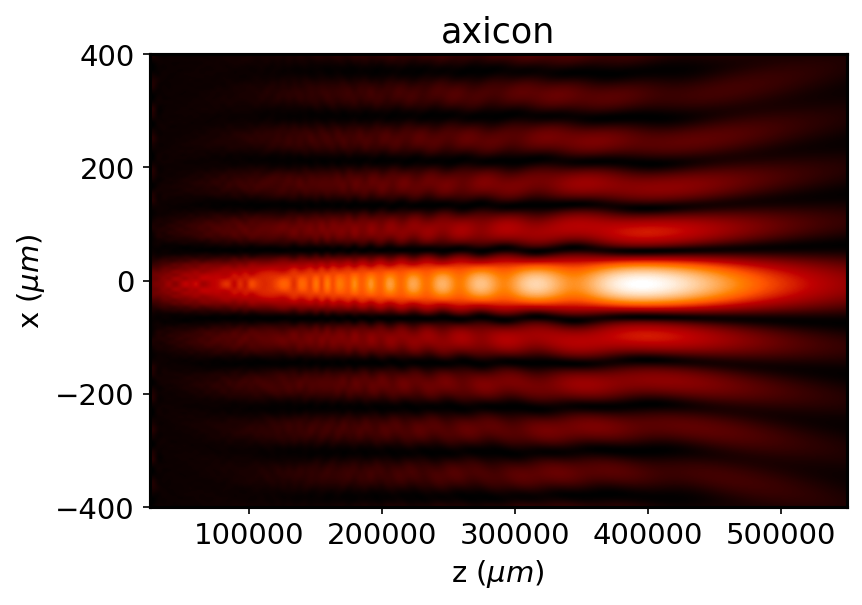

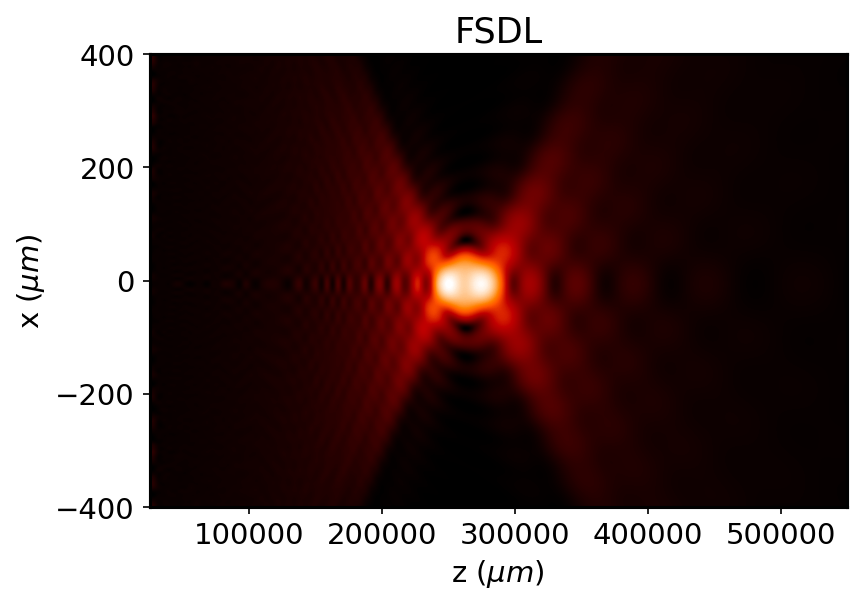

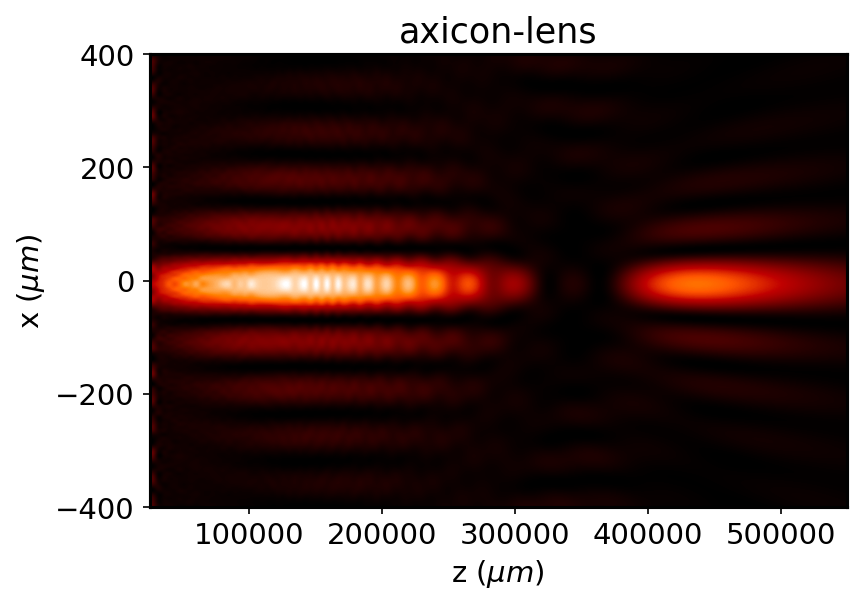

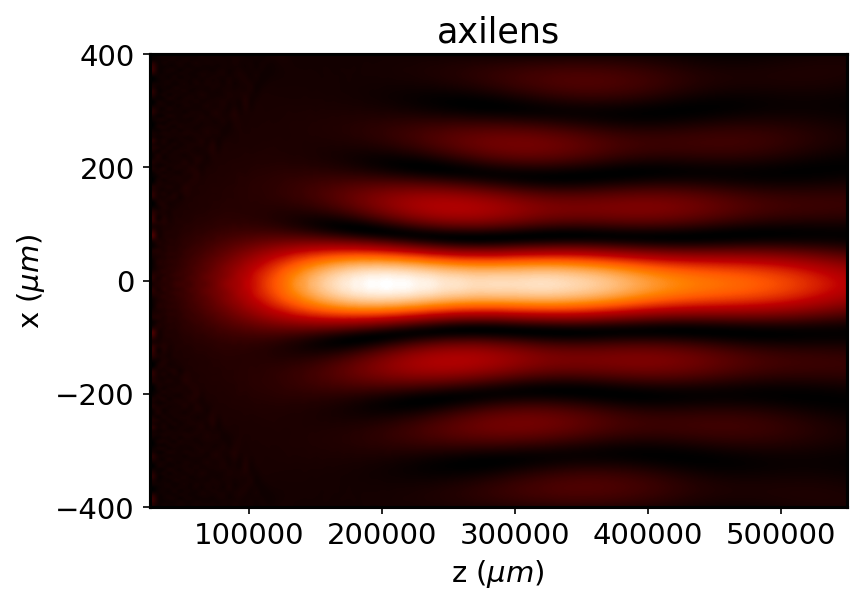

In [ ]:
for t, name in zip(masks, names):
    print("{:11}".format(name), end=':  ')
    u1 = t.CZT(z=z_out, xout=x_out, yout=0, verbose=True)
    u1.draw(logarithm=1e-1)
    plt.title(name)
    fields.append(u1)